In [19]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

### Loading the data

In [20]:
df = pd.read_csv("IRIS.csv")

# Exploring the data

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.shape

(150, 5)

In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

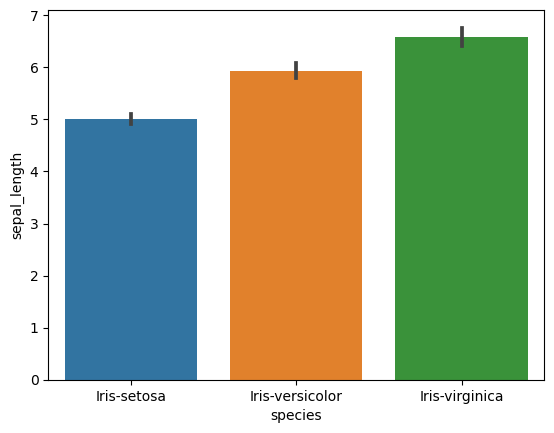

In [26]:
sns.barplot(data=df,x='species',y='sepal_length')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

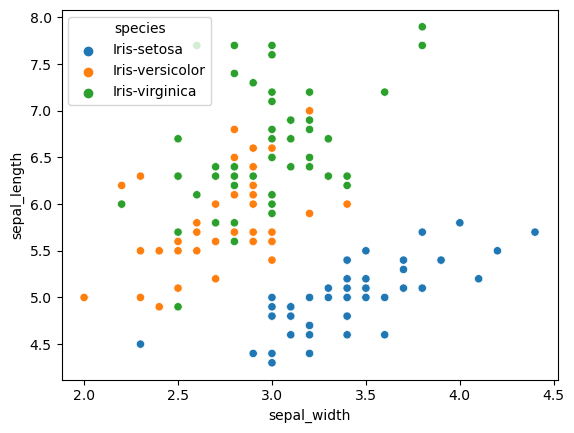

In [27]:
sns.scatterplot(data=df,x='sepal_width',y='sepal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='petal_length'>

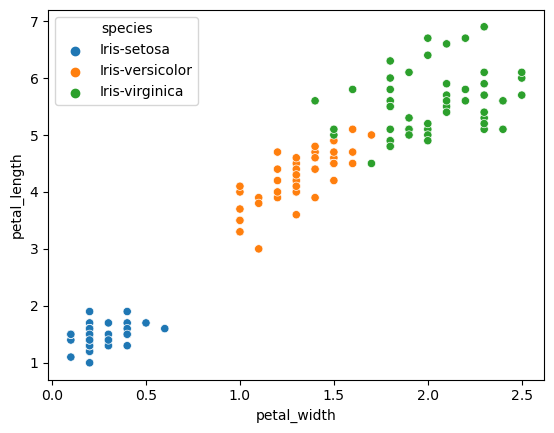

In [28]:
sns.scatterplot(data=df,x='petal_width',y='petal_length',hue='species')

C:\Users\Aagash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


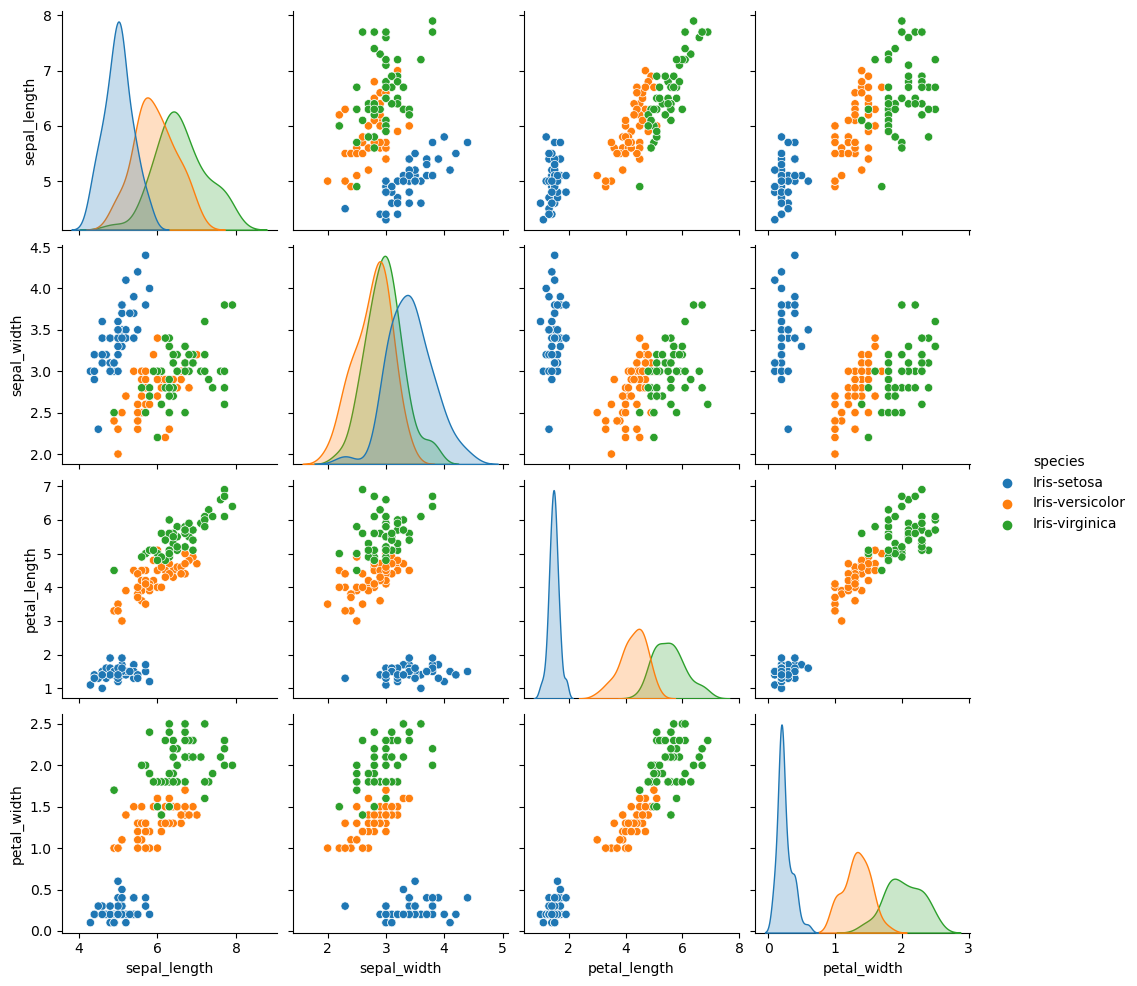

In [29]:
sns.pairplot(df, hue="species")
plt.show()

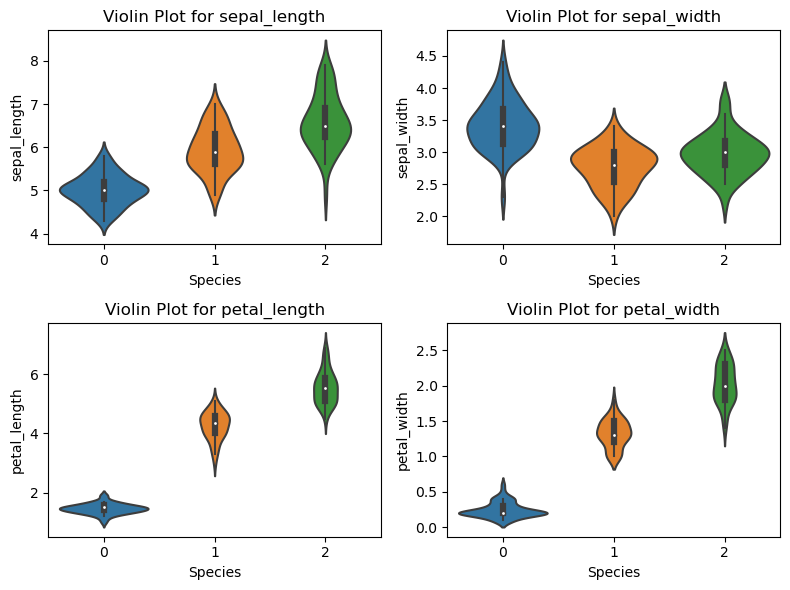

In [93]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, feature in enumerate(features):
    row, col = divmod(i, 2) #to find row and col
    sns.violinplot(x="species", y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Violin Plot for {feature}')
    axes[row, col].set_xlabel("Species")
    axes[row, col].set_ylabel(feature)

# Adjusting layout for better visual
plt.tight_layout()
plt.show()


# Pre-processing

In [30]:
#converting categorical to numerical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [37]:
X = df.drop(columns=['species'])
Y = df['species']

# Choosing a machine learning model

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=7)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


## LightGBM

In [111]:
import lightgbm as lgb

params = {
    "objective": "multiclass",
    "num_class": 3,
    "boosting_type": "gbdt",
    "num_leaves": 3,
    "learning_rate": 0.05,
    "n_estimators": 19
}
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.026292
[LightGBM] [Info] Start training from score -1.149906
[LightGBM] [Info] Start training from score -1.123930
Accuracy: 0.87


## Support Vector

In [76]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the performance of the model
accuray = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuray:.2f}')

Accuracy: 0.97


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

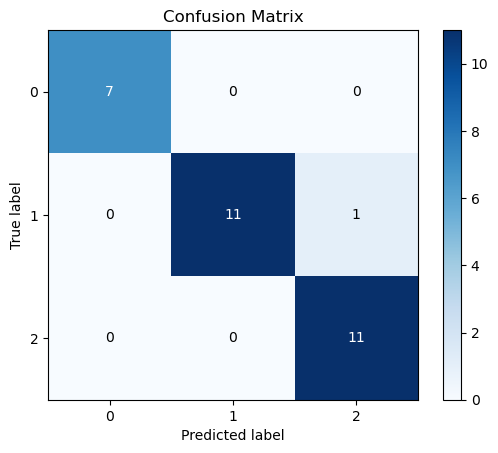

In [77]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, y_pred, normalize=False)

We see that support vector classifier performs good with 97% accuracy!

## Exporting model for further Usages

In [78]:
import joblib
joblib.dump(svc, 'IRIS_MODEL.pkl')

['IRIS_MODEL.pkl']